# Introduction

This notebook leverages pre-defined functions from the `train_random_forest.py` script to train an random forest model on the Sentiment140 dataset using Bag of Words features.

### Setup    

In [8]:
import sys
sys.path.append('../../src/models/')  # Add the path to the script

In [15]:
from train_random_forest import (
    load_bow_features, prepare_features_and_labels, 
    train_random_forest, evaluate_model, save_model
)

from sklearn.model_selection import train_test_split

### Load the cleaned data

In [10]:
import pandas as pd

def load_data(file_path):
    """Load data from a CSV file."""
    return pd.read_csv(file_path)

# Use the load_data function to load your data
df = load_data('../../data/processed/cleaned_data.csv')
df = df.dropna(subset=['clean_text'])

### Feature Engineering: Load BoW Features

In [11]:
bow_df, vectorizer = load_bow_features('../../src/features/Bow.pkl', '../../models/Bow_model.pkl')

### Prepare Features and Labels

In [12]:
# Prepare the features (X) and labels (y) for training
X, y = prepare_features_and_labels(bow_df)

### Train the Random Forest Model

In [13]:
# Train the Random Forest model using the prepared features and labels
model = train_random_forest(X, y, n_estimators=75, max_depth=30, max_features='sqrt', max_samples=0.9)

### Evaluate the Model

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
accuracy, report, conf_matrix = evaluate_model(model, X_test, y_test)
print(f"Model Accuracy on Test Dataset: {round(accuracy, 2)}")
print("\nClassification Report:\n", report)

Model Accuracy on Test Dataset: 0.71

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.57      0.66    158761
           1       0.67      0.85      0.75    159633

    accuracy                           0.71    318394
   macro avg       0.73      0.71      0.71    318394
weighted avg       0.73      0.71      0.71    318394



### Visualization: Confusion Matrix

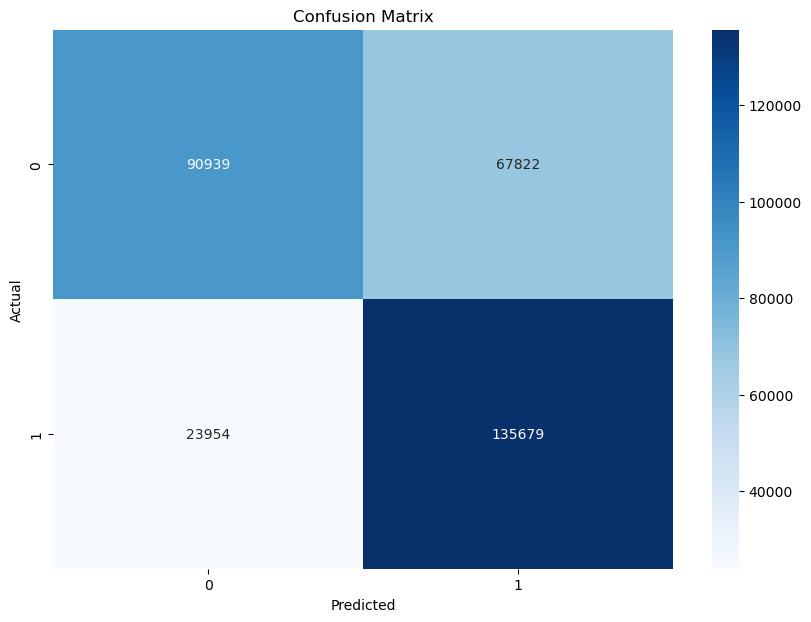

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Save the Model

In [18]:
save_model(model, '../../models/random_forest_model.pkl')